# The simplest Recurrent Neural Network in the world
### Dr. Seong-K. Park

Sequence-to-value 그리고 Sequence-to-Sequence를 세상에서 제일 간단하게 설명하는 예제입니다. 이 보다 더 간단하게 설명하는 예제는 없다는 마음으로 만들었습니다. 

그러나 잊지 마세요, 새로운 지식을 배우기 위해서는 노력이 필요하다는 것을.

In [2]:
%matplotlib inline
import pandas
import matplotlib.pyplot as plt


import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

import numpy as np
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

## ■ Data 순서열의 형태

RNN이 기존 신경망과 가장 다른 점은 순서열을 처리할 수 있다는 점이다. RNN에 입력 벡터 순서열 $x_1,x_2,\cdots,x_n$ 을 차례대로 입력하면 상태 순서열 $s_1,s_2,\cdots,s_n$이 
내부적으로 생성되고 출력으로는 출력 순서열 $o_1,o_2,\cdots,o_n$이 나온다. 만약 원하는 결과가 출력 순서열 $o_1,o_2,\cdots,o_n$
이 target 순서열 $y_1,y_2,\cdots,y_n$ 과 같아지는 것이라면 입력 순서열 길이와 출력 순서열 길이가 같은 특수한 경우의 sequnce-to-sequence (many-to-many) 예측 문제가 되고 순서열의 마지막 출력 $o_n$값이 $y_n$값을 예측하는 것만 목표라면 단순한 sequence-to-value (many-to-one) 문제가 된다.

<img src="diags.jpeg" alt="Drawing" style="width: 800px;"/>

## ■ data를 정규화한후 plot하고 data를 train data 와 test data로 분류하는 프로그램

lngth(=100)와 sgmt(=3)가 독립변수이니 변화시켜 가면서 결과를 보시면 이해하기 훨씬 좋을 것 입니다. 일반적으로 lngth >> sgmt가 되어야 하니 참고 하시면 됩니다.

<br>
<p style="color:blue;">
예제로 사용하는 data는 실제로는 여러분들의 관심분야를 예측하기 위해 꼭 필요한 data를 최대한 노이즈를 줄여서 가져온 것이라고 생각하시면 됩니다.
</p>

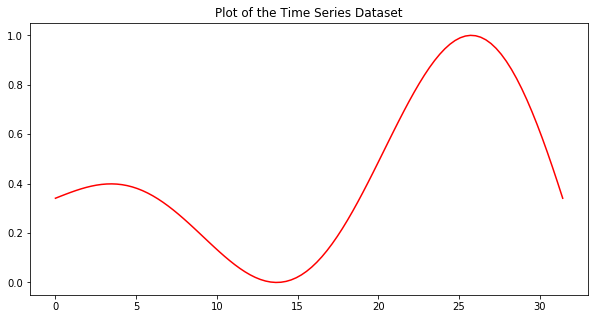

In [17]:
lngth = 100; sgmt = 3

tngth = lngth - sgmt; tlngth = tngth - sgmt + 1





t = np.linspace(0, 10*np.pi, lngth); s = t * np.cos(2 * 0.125 * t)

###############################################################

t = t.reshape((t.shape[0], 1)); s = s.reshape((s.shape[0], 1))

scaler = MinMaxScaler(feature_range=(0, 1))
s = scaler.fit_transform(s)


###############################################################


x_data = np.zeros((tngth, sgmt,1))
y_data = np.zeros((tngth))

X_data = np.zeros((tlngth, sgmt,1))
Y_data = np.zeros((tlngth, sgmt,1))



plt.figure(figsize=(10, 5), frameon=False)
plt.plot(t, s, 'r-')
plt.title("Plot of the Time Series Dataset")
plt.show()


I, J, K = x_data.shape

for i in range(I):
    for j in range(J):
        x_data[i,j,0] = s[i+j]
    y_data[i] = s[i+sgmt]

x_data = x_data.astype('float32')    
    
    

tr_size = int(I*0.77); ts_size = I - tr_size        
    
x_train = x_data[0:tr_size]; x_test = x_data[tr_size:I] 
y_train = y_data[0:tr_size]; y_test = y_data[tr_size:I] 










    
I, J, K = X_data.shape

for i in range(I):
    for j in range(J):
        X_data[i,j,0] = s[i+j]
        Y_data[i,j,0] = s[i+sgmt+j]


tr_size = int(I*0.77); ts_size = I - tr_size        
    
X_train = X_data[0:tr_size]; X_test = X_data[tr_size:I]    
Y_train = Y_data[0:tr_size]; Y_test = Y_data[tr_size:I] 

## ■ Sequence-to-Value (input:파란색, target: 빨간색) training data plot

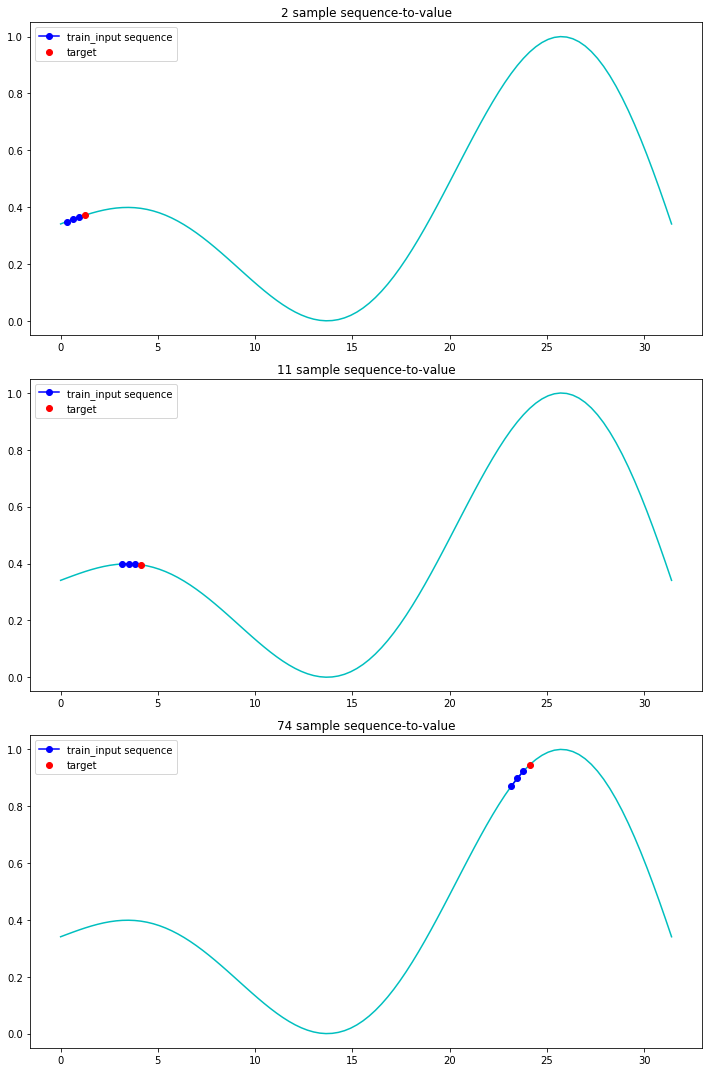

In [47]:
plt.figure(figsize=(10, 15), frameon=False)    

plt.subplot(311)
plt.plot(t, s, 'c-')

i = 1
plt.plot(t[i:sgmt+i], x_train[i].flatten(), 'bo-', label="train_input sequence")
plt.plot(t[sgmt+i], y_train[i], 'ro', label="target")

plt.legend()
plt.title("%d sample sequence-to-value" % (i+1))


plt.subplot(312)
plt.plot(t, s, 'c-')


i = 10
plt.plot(t[i:sgmt+i], x_train[i].flatten(), 'bo-', label="train_input sequence")
plt.plot(t[sgmt+i], y_train[i], 'ro', label="target")

plt.legend()
plt.title("%d sample sequence-to-value" % (i+1))


plt.subplot(313)
plt.plot(t, s, 'c-')

i = x_train.shape[0]-1
plt.plot(t[i:sgmt+i], x_train[i].flatten(), 'bo-', label="train_input sequence")
plt.plot(t[sgmt+i], y_train[i], 'ro', label="target")

plt.legend()
plt.title("%d sample sequence-to-value" % (i+1))



plt.tight_layout()
plt.show()   

## ■ Sequence-to-Value (input:파란색, target: 빨간색) testing data plot

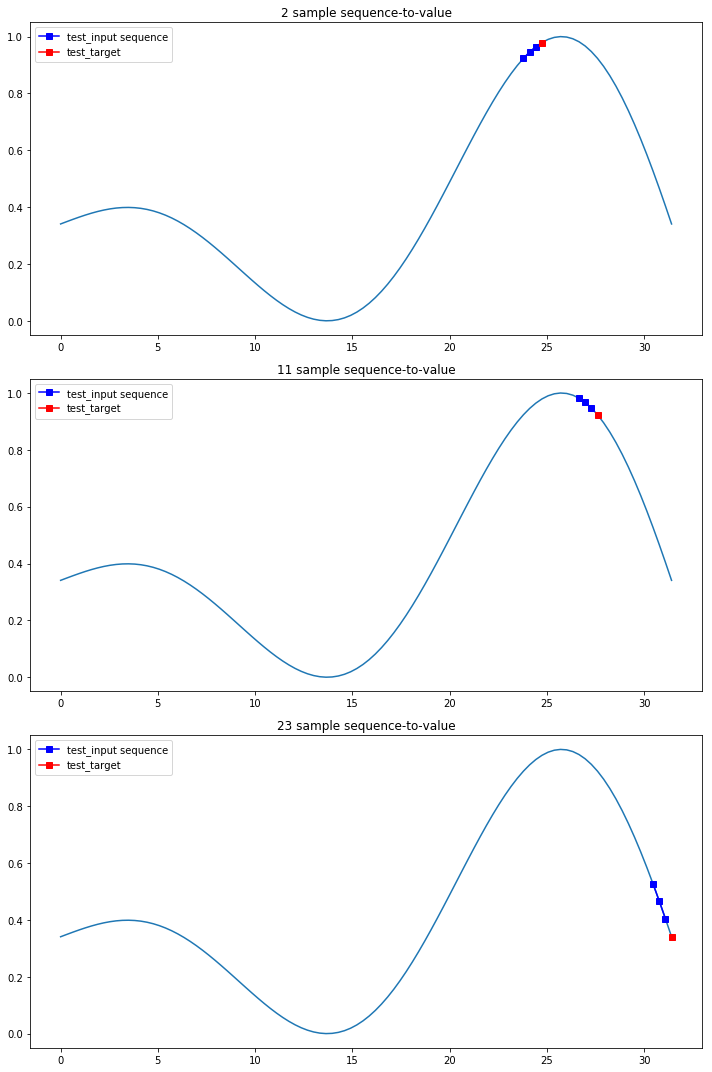

In [44]:
plt.figure(figsize=(10, 15), frameon=False)    


plt.subplot(311)
plt.plot(t, s, '-')

i = 1; j = x_train.shape[0]
plt.plot(t[j+i:j+sgmt+i], x_test[i].flatten(), 'bs-', label="test_input sequence")
plt.plot(t[j+sgmt+i], y_test[i].flatten(), 'rs-', label="test_target")

plt.legend()
plt.title("%d sample sequence-to-value" % (i+1))


plt.subplot(312)
plt.plot(t, s, '-')

i = 10; j = x_train.shape[0]
plt.plot(t[j+i:j+sgmt+i], x_test[i].flatten(), 'bs-', label="test_input sequence")
plt.plot(t[j+sgmt+i], y_test[i].flatten(), 'rs-', label="test_target")

plt.legend()
plt.title("%d sample sequence-to-value" % (i+1))


plt.subplot(313)
plt.plot(t, s, '-')

i = x_test.shape[0]-1; j = x_train.shape[0]
plt.plot(t[j+i:j+sgmt+i], x_test[i].flatten(), 'bs-', label="test_input sequence")
plt.plot(t[j+sgmt+i], y_test[i].flatten(), 'rs-', label="test_target")

plt.legend()
plt.title("%d sample sequence-to-value" % (i+1))



plt.tight_layout()
plt.show()   

## ■ Sequence-to-Value의 SimpleRNN 구조 정의와 training 하기

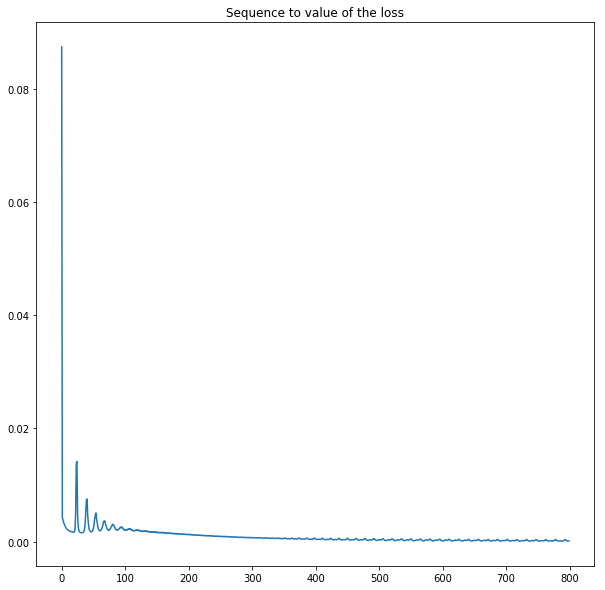

In [38]:
np.random.seed(0)

model = Sequential()
model.add(SimpleRNN(x_train.shape[0]-1, input_shape= x_train.shape[1:]))
model.add(Dense(1))
model.compile(loss='mse', optimizer='rmsprop')

history = model.fit(x_train, y_train, epochs=800, batch_size = x_train.shape[0], verbose=0)

plt.figure(figsize=(10, 10), frameon=False)
plt.plot(history.history["loss"])
plt.title("Sequence to value of the loss")
plt.show()


## ■ Sequence-to-value (train:파란색, test: 빨간색) prediciton result plot

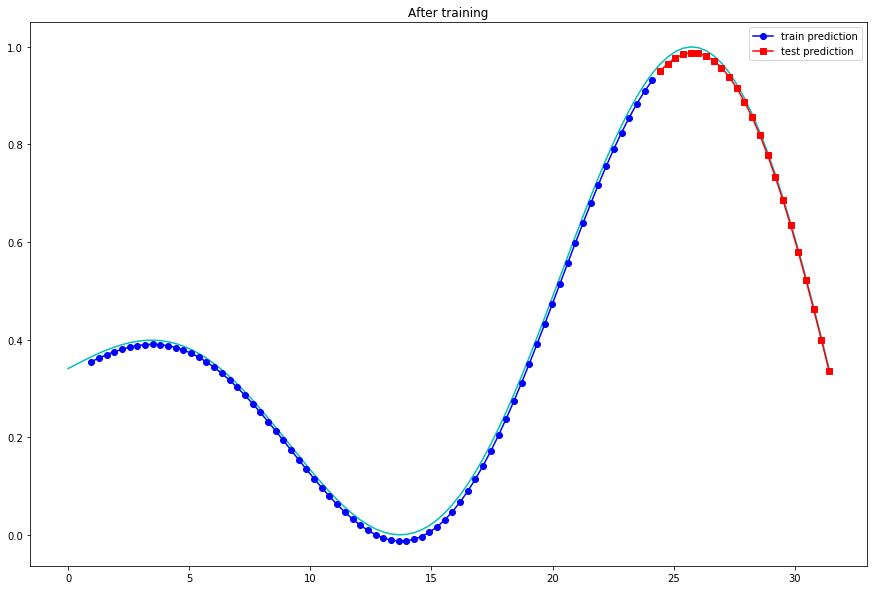

In [39]:
plt.figure(figsize=(15, 10), frameon=False)

plt.plot(t,s,'c-')

i = x_train.shape[0]; j = x_test.shape[0]
plt.plot(t[sgmt:sgmt+i], model.predict(x_train), 'bo-', label="train prediction")
plt.plot(t[sgmt+i:sgmt+i+j], model.predict(x_test), 'rs-', label="test prediction")


plt.legend()
plt.title("After training")
plt.show()



## ■ Sequence-to-Sequence (input:파란색, target: 빨간색) training data plot

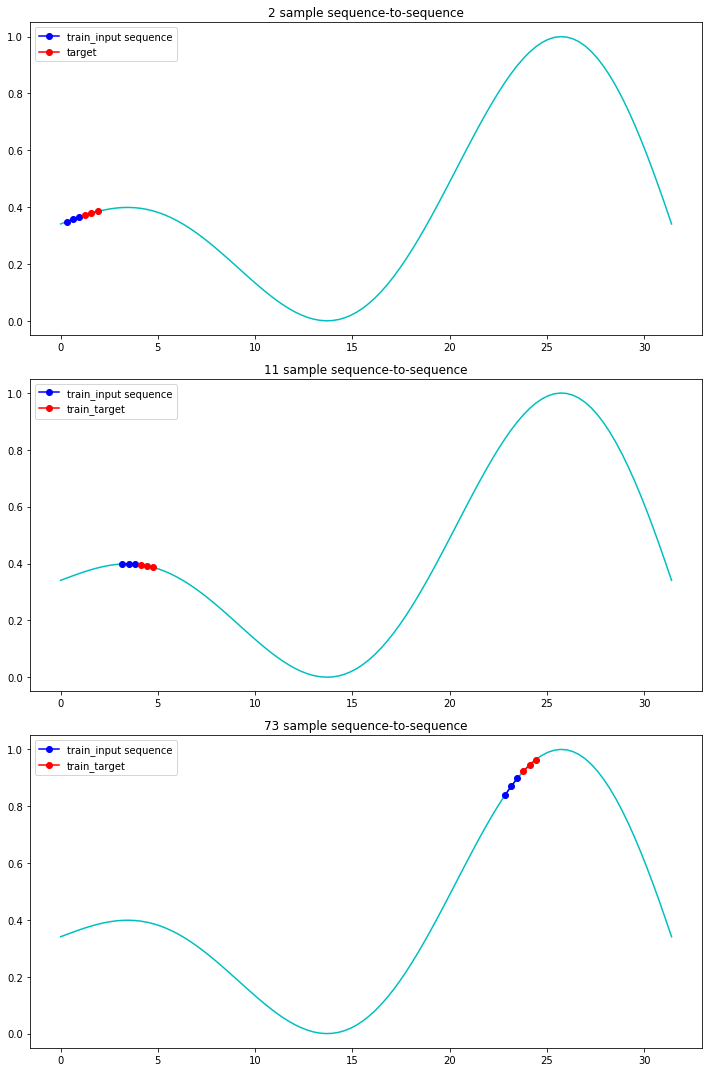

In [22]:
plt.figure(figsize=(10, 15), frameon=False)    

plt.subplot(311)
plt.plot(t, s, 'c-')

i = 1;
plt.plot(t[i:sgmt+i], X_train[i].flatten(), 'bo-', label="train_input sequence")
plt.plot(t[sgmt+i:2*sgmt+i], Y_train[i].flatten(), 'ro-', label="target")
plt.legend()
plt.title("%d sample sequence-to-sequence" % (i+1))


plt.subplot(312)
plt.plot(t, s, 'c-')

i = 10;
plt.plot(t[i:sgmt+i], X_train[i].flatten(), 'bo-', label="train_input sequence")
plt.plot(t[sgmt+i:2*sgmt+i], Y_train[i].flatten(), 'ro-', label="train_target")
plt.legend()
plt.title("%d sample sequence-to-sequence" % (i+1))


plt.subplot(313)
plt.plot(t, s, 'c-')

i = X_train.shape[0]-1;
plt.plot(t[i:sgmt+i], X_train[i].flatten(), 'bo-', label="train_input sequence")
plt.plot(t[sgmt+i:2*sgmt+i], Y_train[i].flatten(), 'ro-', label="train_target")
plt.legend()
plt.title("%d sample sequence-to-sequence" % (i+1))


plt.tight_layout()
plt.show()   

## ■ Sequence-to-Sequence (input:파란색, target: 빨간색) testing data plot

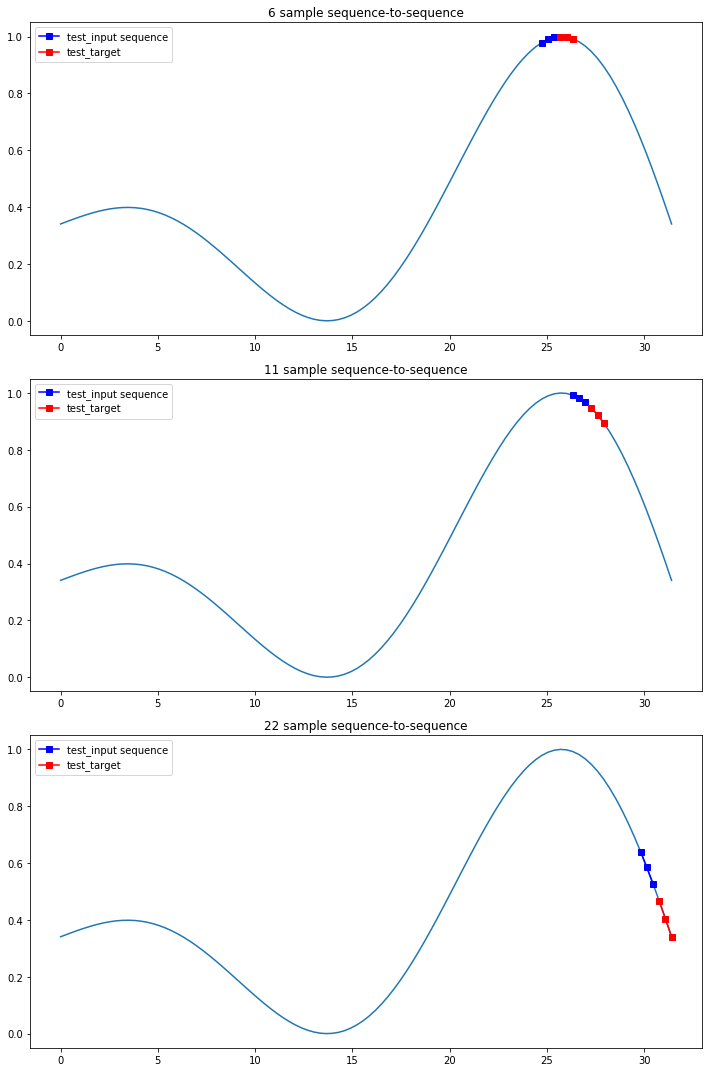

In [45]:
plt.figure(figsize=(10, 15), frameon=False)    



plt.subplot(311)
plt.plot(t, s, '-')

i = 5; j = X_train.shape[0]
plt.plot(t[j+i:j+sgmt+i], X_test[i].flatten(), 'bs-', label="test_input sequence")
plt.plot(t[j+sgmt+i:j+2*sgmt+i], Y_test[i].flatten(), 'rs-', label="test_target")
plt.legend()
plt.title("%d sample sequence-to-sequence" % (i+1))

plt.subplot(312)
plt.plot(t, s, '-')

i = 10; j = X_train.shape[0]
plt.plot(t[j+i:j+sgmt+i], X_test[i].flatten(), 'bs-', label="test_input sequence")
plt.plot(t[j+sgmt+i:j+2*sgmt+i], Y_test[i].flatten(), 'rs-', label="test_target")
plt.legend()
plt.title("%d sample sequence-to-sequence" % (i+1))


plt.subplot(313)
plt.plot(t, s, '-')

i = X_test.shape[0]-1; j = X_train.shape[0]
plt.plot(t[j+i:j+sgmt+i], X_test[i].flatten(), 'bs-', label="test_input sequence")
plt.plot(t[j+sgmt+i:j+2*sgmt+i], Y_test[i].flatten(), 'rs-', label="test_target")
plt.legend()
plt.title("%d sample sequence-to-sequence" % (i+1))

plt.tight_layout()
plt.show()   

## ■ Sequence-to-Sequence의 SimpleRNN 구조 정의와 training 하기

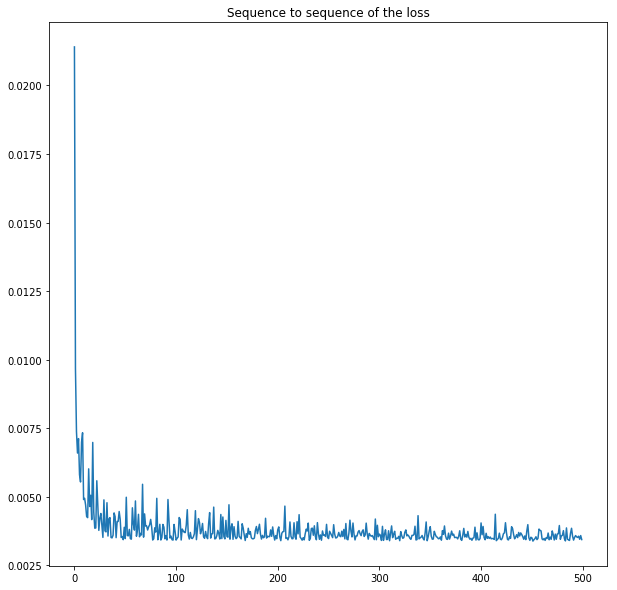

In [40]:
from keras.layers import TimeDistributed

model2 = Sequential()
model2.add(SimpleRNN(X_train.shape[0]-1, return_sequences=True, input_shape=(sgmt, 1)))
model2.add(TimeDistributed(Dense(1)))
model2.compile(loss='mse', optimizer='rmsprop')


history2 = model2.fit(X_train, Y_train, epochs=500, verbose=0)


plt.figure(figsize=(10, 10), frameon=False)
plt.plot(history2.history["loss"])
plt.title("Sequence to sequence of the loss")
plt.show()




## ■ Sequence-to-Sequence (train: 빨간색) prediciton result plot

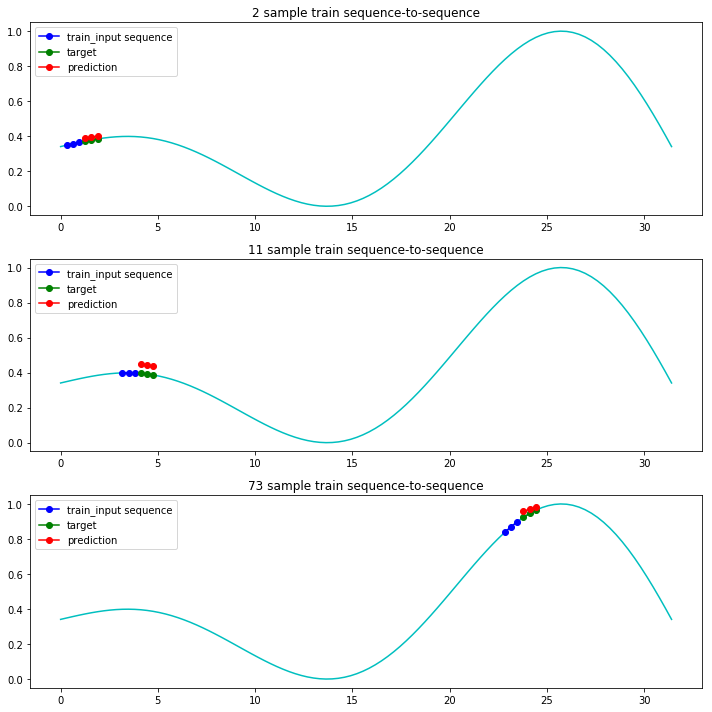

In [41]:
plt.figure(figsize=(10, 10), frameon=False)    

plt.subplot(311)
plt.plot(t, s, 'c-')

i = 1; j = X_train.shape[0]
plt.plot(t[i:sgmt+i], X_train[i].flatten(), 'bo-', label="train_input sequence")

plt.plot(t[sgmt+i:2*sgmt+i], Y_train[i].flatten(), 'go-', label="target")
plt.plot(t[sgmt+i:2*sgmt+i], model2.predict(X_train[i:i+1,:,:]).flatten(), 'ro-', label="prediction")

plt.legend()
plt.title("%d sample train sequence-to-sequence" % (i+1))

plt.subplot(312)
plt.plot(t, s, 'c-')

i = 10; j = X_train.shape[0]
plt.plot(t[i:sgmt+i], X_train[i].flatten(), 'bo-', label="train_input sequence")

plt.plot(t[sgmt+i:2*sgmt+i], Y_train[i].flatten(), 'go-', label="target")
plt.plot(t[sgmt+i:2*sgmt+i], model2.predict(X_train[i:i+1,:,:]).flatten(), 'ro-', label="prediction")
plt.legend()
plt.title("%d sample train sequence-to-sequence" % (i+1))


plt.subplot(313)
plt.plot(t, s, 'c-')

j = X_train.shape[0]; i = j-1
plt.plot(t[i:sgmt+i], X_train[i].flatten(), 'bo-', label="train_input sequence")

plt.plot(t[sgmt+i:2*sgmt+i], Y_train[i].flatten(), 'go-', label="target")
plt.plot(t[sgmt+i:2*sgmt+i], model2.predict(X_train[i:i+1,:,:]).flatten(), 'ro-', label="prediction")
plt.legend()
plt.title("%d sample train sequence-to-sequence" % (i+1))



plt.tight_layout()
plt.show()

## ■ Sequence-to-Sequence (test: 빨간색) prediciton result plot

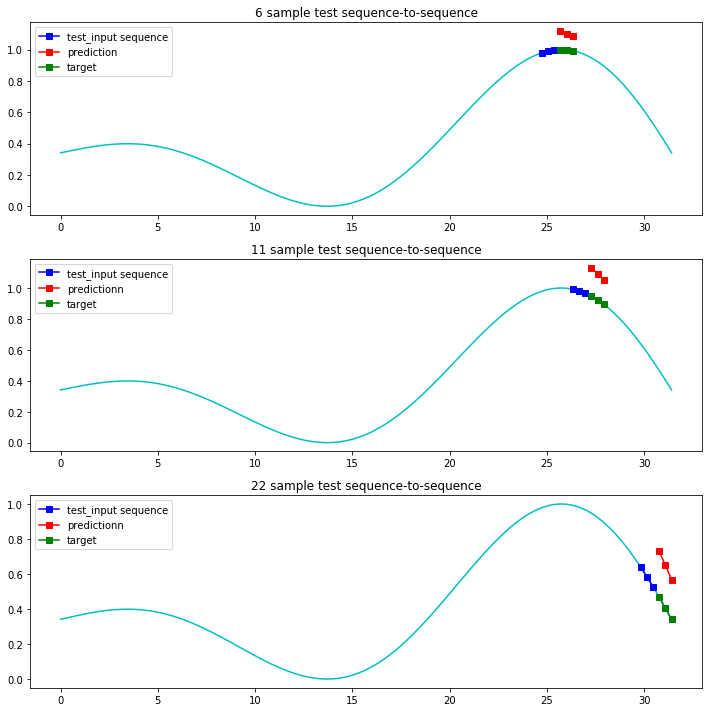

In [49]:
plt.figure(figsize=(10, 10), frameon=False)    




plt.subplot(311)
plt.plot(t, s, 'c-')


i = 5; j = X_train.shape[0]
plt.plot(t[i+j:sgmt+i+j], X_test[i].flatten(), 'bs-', label="test_input sequence")
plt.plot(t[sgmt+i+j:2*sgmt+i+j], model2.predict(X_test[i:i+1,:,:]).flatten(), 'rs-', label="prediction")
plt.plot(t[sgmt+i+j:2*sgmt+i+j], Y_test[i].flatten(), 'gs-', label="target")

plt.legend()
plt.title("%d sample test sequence-to-sequence" % (i+1))


plt.subplot(312)
plt.plot(t, s, 'c-')


i = 10;
plt.plot(t[i+j:sgmt+i+j], X_test[i].flatten(), 'bs-', label="test_input sequence")
plt.plot(t[sgmt+i+j:2*sgmt+i+j], model2.predict(X_test[i:i+1,:,:]).flatten(), 'rs-', label="predictionn")
plt.plot(t[sgmt+i+j:2*sgmt+i+j], Y_test[i].flatten(), 'gs-', label="target")

plt.legend()
plt.title("%d sample test sequence-to-sequence" % (i+1))


plt.subplot(313)
plt.plot(t, s, 'c-')


i = X_test.shape[0]-1;
plt.plot(t[i+j:sgmt+i+j], X_test[i].flatten(), 'bs-', label="test_input sequence")
plt.plot(t[sgmt+i+j:2*sgmt+i+j], model2.predict(X_test[i:i+1,:,:]).flatten(), 'rs-', label="predictionn")
plt.plot(t[sgmt+i+j:2*sgmt+i+j], Y_test[i].flatten(), 'gs-', label="target")

plt.legend()
plt.title("%d sample test sequence-to-sequence" % (i+1))

plt.tight_layout()
plt.show()



# 결론

### ■ Sequence-to-Value 의 경우가 Sequence-to-Sequence 보다 더 좋은 예측 결과를 보여주고 있습니다.

Sequence-to-Sequence 시계열이 훨씬 Deep한 경우는 더 불확실한 예측 결과를 보일 것 입니다. 따라서 시계열의 깊이(Deep)는 실험으로 먼저 확인 한 후 여러분들의 문제에 적용 하시기 바랍니다.  